In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
def plot_image(image_1, image_2, title_1="Original", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(image_1, cmap='gray')
    plt.title(title_1)
    plt.subplot(1,2,2)
    plt.imshow(image_2, cmap="gray")
    plt.title(title_2)
    plt.show()

In [3]:
def plot_hist(old_image, new_image, title_old="Original", title_new="New Image"):
    intensity_values = np.array([x for x in range(256)])
    plt.subplot(1,2,1)
    plt.bar(intensity_values, cv2.calcHist([old_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_old)
    plt.xlabel('intensity')
    plt.subplot(1, 2, 2)
    plt.bar(intensity_values, cv2.calcHist([new_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_new)
    plt.xlabel('intensity')
    plt.show()

## Toy Example

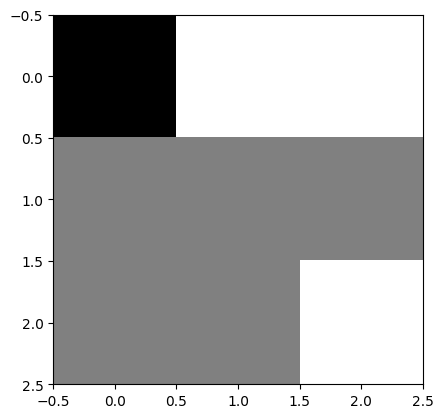

toy_image: [[0 2 2]
 [1 1 1]
 [1 1 2]]


In [4]:
toy_image = np.array([[0,2,2],[1,1,1],[1,1,2]],dtype=np.uint8)
plt.imshow(toy_image, cmap="gray")
plt.show()
print("toy_image:",toy_image)

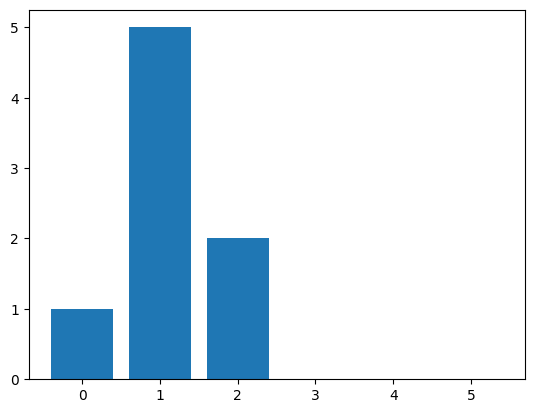

In [5]:
plt.bar([x for x in range(6)],[1,5,2,0,0,0])
plt.show()

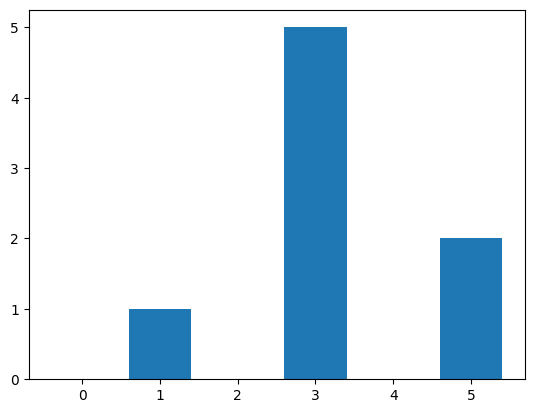

In [6]:
plt.bar([x for x in range(6)],[0,1,0,5,0,2])
plt.show()

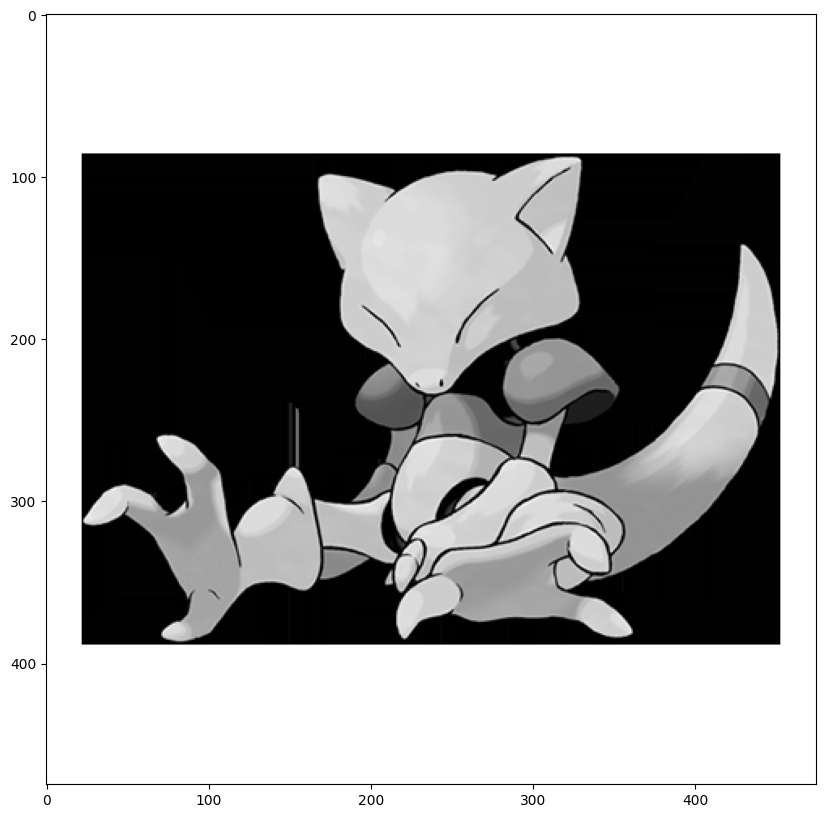

In [7]:
abra_path = "/kaggle/input/pokemon-images-first-generation17000-files/pokemon/Abra/00000000.png"
abra = cv2.imread(abra_path,cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(abra,cmap="gray")
plt.show()

## Histograms

A histogram counts the number of occurrences of the intensity values of pixels, and it's a useful tool for understanding and manipulating images. We use cv.calcHist() to generate the histogram. Here are the parameter values:

cv2.calcHist(CV array:[image] this is the image channel:[0],for this course it will always be [None],the number of bins:[L],the range of index of bins:[0,L-1]) 

For real images, L is 256.

In [8]:
hist = cv2.calcHist([abra],[0],None,[256],[0,256])

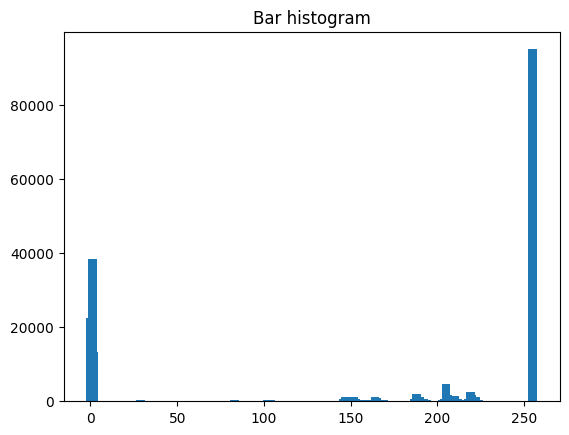

In [9]:
intensity_values = np.array([x for x in range(hist.shape[0])])
plt.bar(intensity_values, hist[:,0], width = 5)
plt.title("Bar histogram")
plt.show()

In [10]:
PMF = hist / (abra.shape[0] * abra.shape[1])

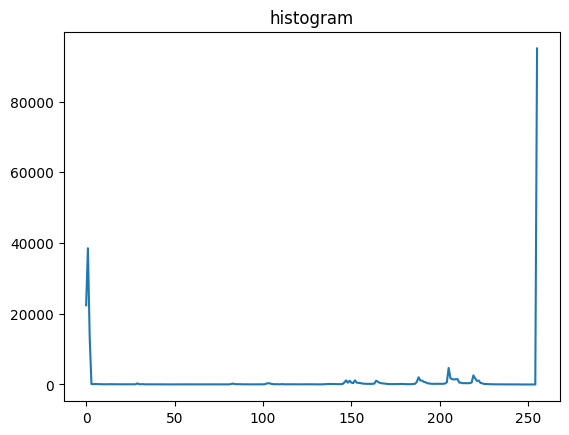

In [11]:
plt.plot(intensity_values,hist)
plt.title("histogram")
plt.show()

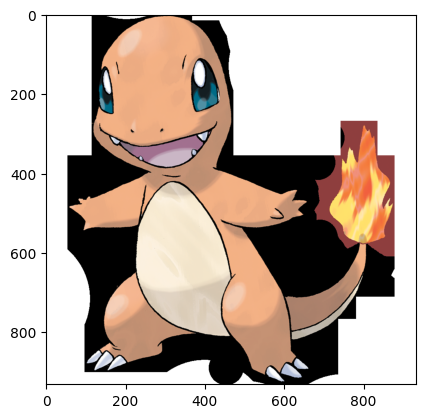

In [12]:
import cv2
charmander_path = "/kaggle/input/pokemon-images-first-generation17000-files/pokemon/Charmander/00000000.png"
charmander = cv2.imread(charmander_path)
plt.imshow(cv2.cvtColor(charmander,cv2.COLOR_BGR2RGB))
plt.show()

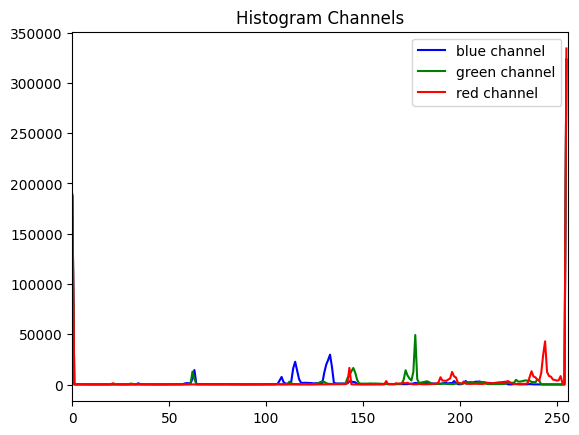

In [13]:
color = ('blue','green','red')
for i,col in enumerate(color):
    histr = cv2.calcHist([charmander],[i],None,[256],[0,256])
    plt.plot(intensity_values,histr,color = col,label=col+" channel")
    
    plt.xlim([0,256])
plt.legend()
plt.title("Histogram Channels")
plt.show()

In [14]:
neg_toy_image = -1 * toy_image + 255

print("toy image\n", neg_toy_image)
print("image negatives\n", neg_toy_image)

toy image
 [[255 253 253]
 [254 254 254]
 [254 254 253]]
image negatives
 [[255 253 253]
 [254 254 254]
 [254 254 253]]


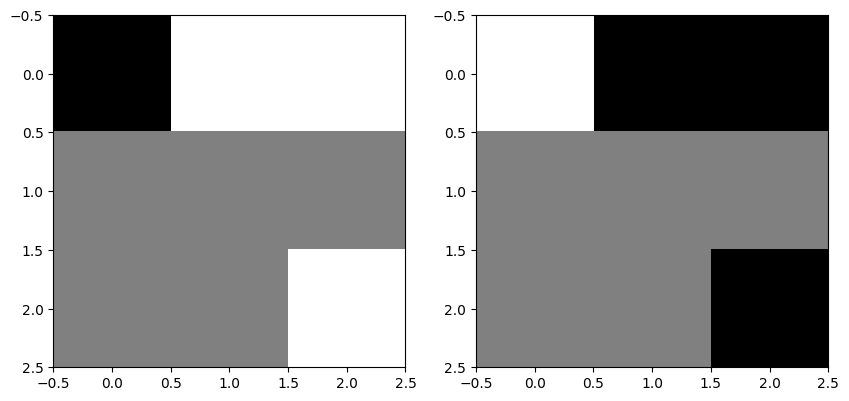

toy_image: [[0 2 2]
 [1 1 1]
 [1 1 2]]


In [15]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1) 
plt.imshow(toy_image,cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(neg_toy_image,cmap="gray")
plt.show()
print("toy_image:",toy_image)

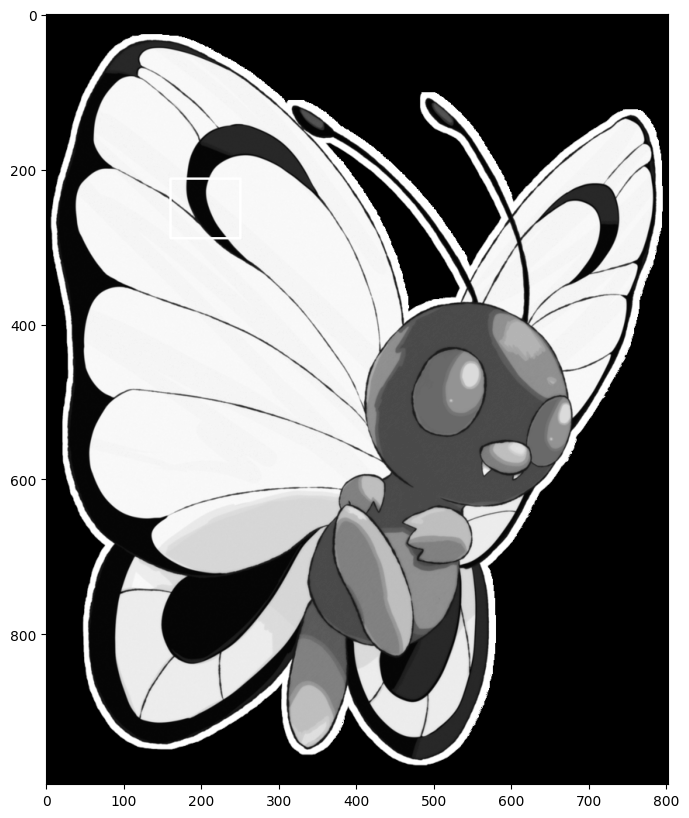

In [16]:
butterfree = "/kaggle/input/pokemon-images-first-generation17000-files/pokemon/Butterfree/00000006.png"
image = cv2.imread(butterfree, cv2.IMREAD_GRAYSCALE)
cv2.rectangle(image, pt1=(160, 212), pt2=(250, 289), color = (255), thickness=2) 
plt.figure(figsize = (10,10))
plt.imshow(image, cmap="gray")
plt.show()

In [17]:
img_neg = -1 * image + 255

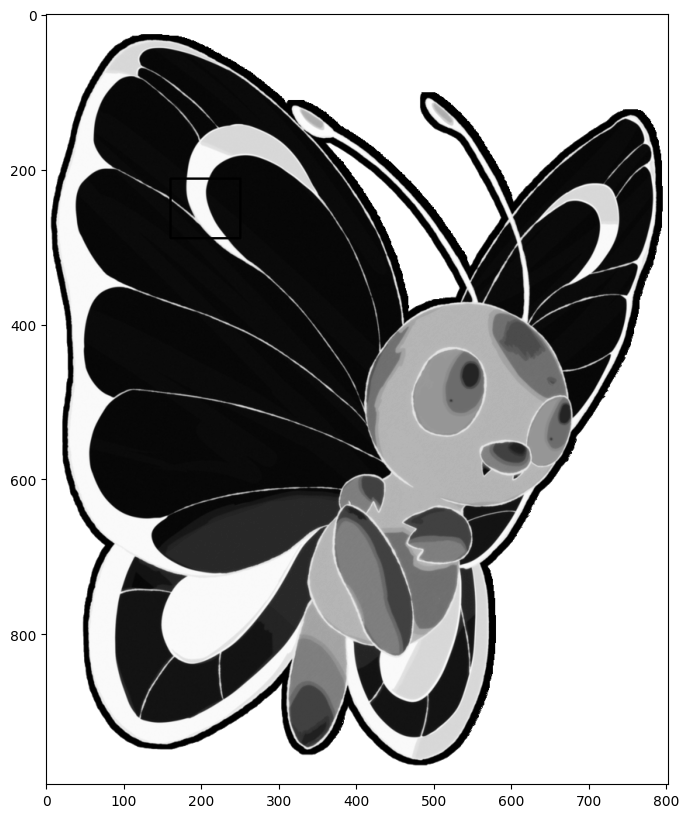

In [18]:
plt.figure(figsize=(10,10))
plt.imshow(img_neg, cmap = "gray")
plt.show()

## Brightness and contrast adjustments


In [19]:
alpha = 1 # Simple contrast control
beta = 100   # Simple brightness control   
butter_free_array = cv2.imread(butterfree)
new_image = cv2.convertScaleAbs(butter_free_array, alpha=alpha, beta=beta)

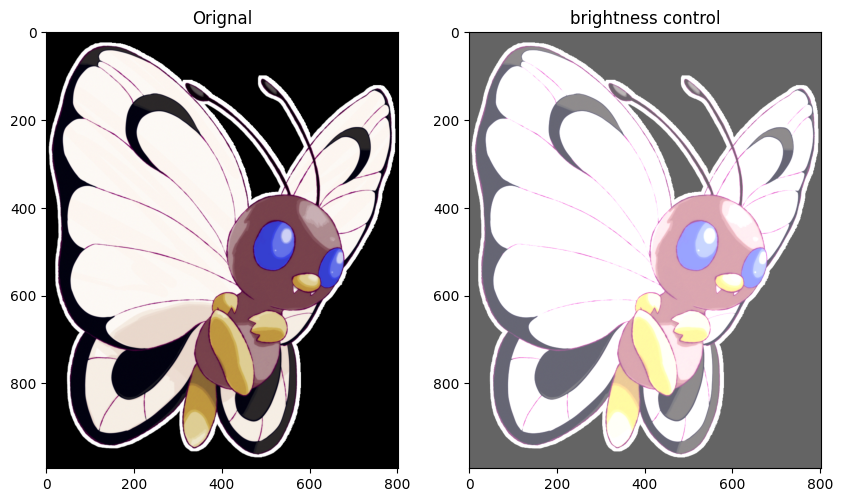

In [20]:
plot_image(butter_free_array, new_image, title_1 = "Orignal", title_2 = "brightness control")

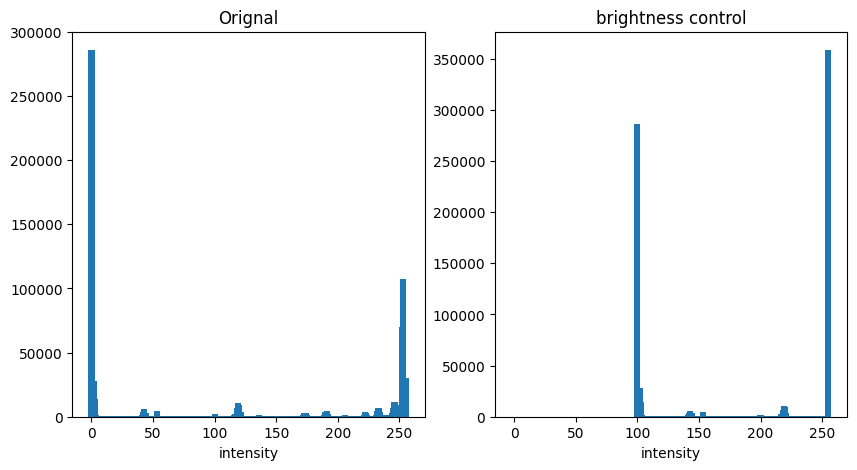

In [21]:
plt.figure(figsize=(10,5))
plot_hist(butter_free_array, new_image, "Orignal", "brightness control")

In [22]:
plt.figure(figsize=(10,5))
alpha = 2# Simple contrast control
beta = 0 # Simple brightness control   # Simple brightness control
new_image = cv2.convertScaleAbs(butter_free_array, alpha=alpha, beta=beta)

<Figure size 1000x500 with 0 Axes>

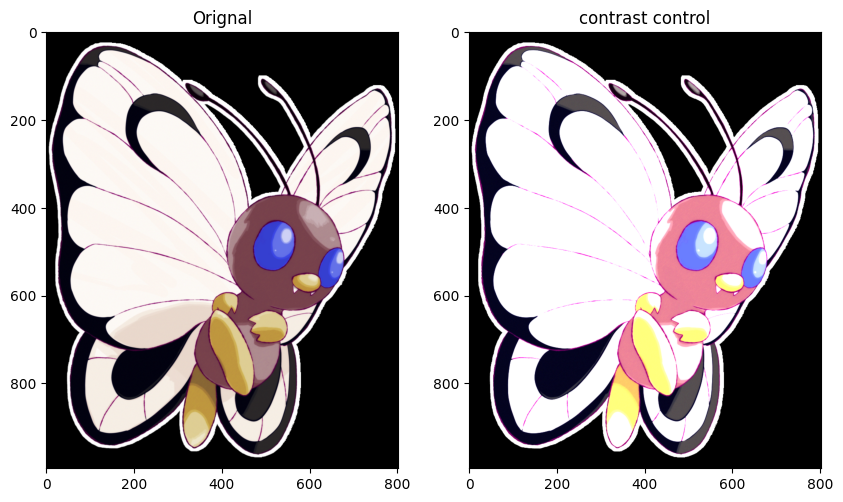

In [23]:
plot_image(butter_free_array,new_image,"Orignal","contrast control")

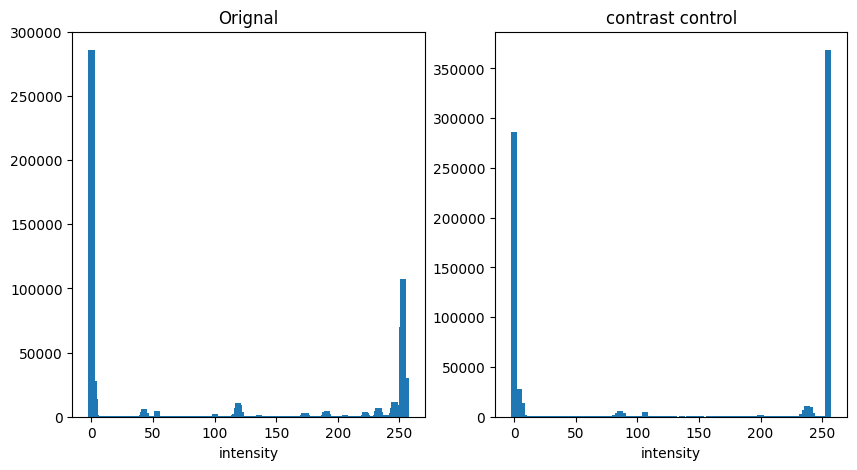

In [24]:
plt.figure(figsize=(10,5))
plot_hist(butter_free_array, new_image,"Orignal","contrast control")

In [25]:
plt.figure(figsize=(10,5))
alpha = 3 # Simple contrast control
beta = -200  # Simple brightness control   
new_image = cv2.convertScaleAbs(butter_free_array, alpha=alpha, beta=beta)

<Figure size 1000x500 with 0 Axes>

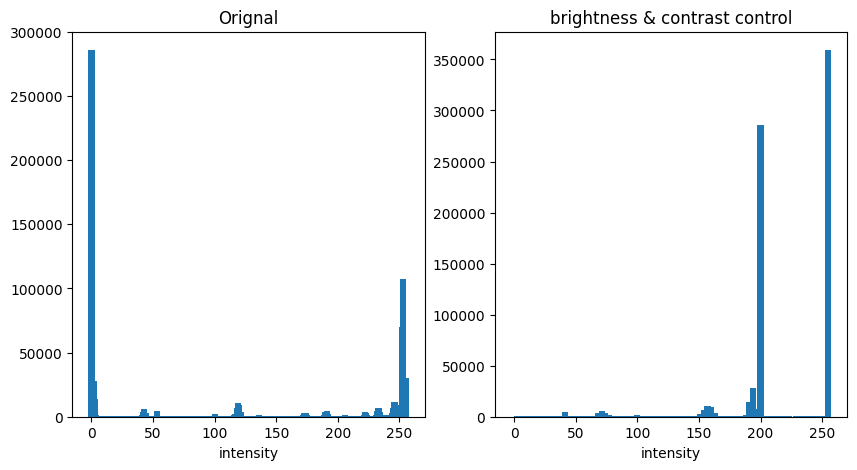

In [26]:
plt.figure(figsize=(10,5))
plot_hist(butter_free_array, new_image, "Orignal", "brightness & contrast control")

## Histogram Equalization

Histogram Equalization increases the contrast of images, by stretching out the range of the grayscale pixels; It does this by flatting the histogram. We simply apply the function cv2.equalizeHist.

In [27]:
articuno_path ="/kaggle/input/pokemon-images-first-generation17000-files/pokemon/Articuno/00000005.png"
articuno = cv2.imread(articuno_path,cv2.IMREAD_GRAYSCALE)
new_image = cv2.equalizeHist(articuno)

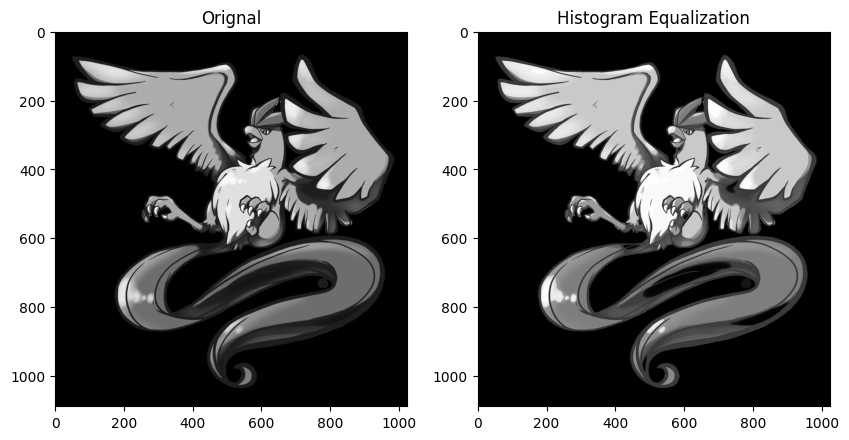

In [28]:
plot_image(articuno,new_image,"Orignal","Histogram Equalization")

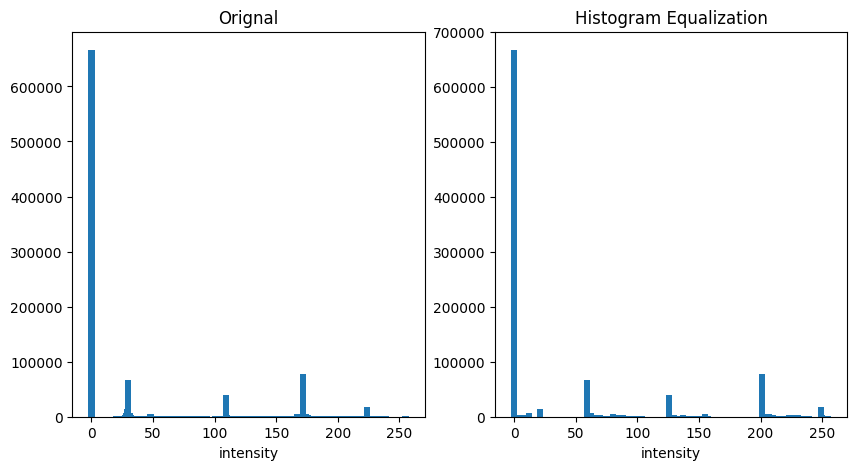

In [29]:
plt.figure(figsize=(10,5))
plot_hist(articuno, new_image,"Orignal","Histogram Equalization")

## Thresholding and Simple Segmentation

Thresholding is used in image segmentation this means extracting objects from an image. Image segmentation is used in many applications including extracting text, medical imaging, and industrial imaging. Thresholding an image takes a threshold; If a particular pixel (i,j) is greater than that threshold it will set that pixel to some value usually 1 or 255, otherwise, it will set it to another value, usually zero. We can write a Python function that will perform thresholding and output a new image given some input grayscale image:


In [30]:
def thresholding(input_img,threshold,max_value=255, min_value=0):
    N,M=input_img.shape
    image_out=np.zeros((N,M),dtype=np.uint8)
        
    for i  in range(N):
        for j in range(M):
            if input_img[i,j]> threshold:
                image_out[i,j]=max_value
            else:
                image_out[i,j]=min_value
                
    return image_out                             

In [31]:
toy_image

array([[0, 2, 2],
       [1, 1, 1],
       [1, 1, 2]], dtype=uint8)

In [32]:
threshold = 1
max_value = 2
min_value = 0
thresholding_toy = thresholding(toy_image, threshold=threshold, max_value=max_value, min_value=min_value)
thresholding_toy

array([[0, 2, 2],
       [0, 0, 0],
       [0, 0, 2]], dtype=uint8)

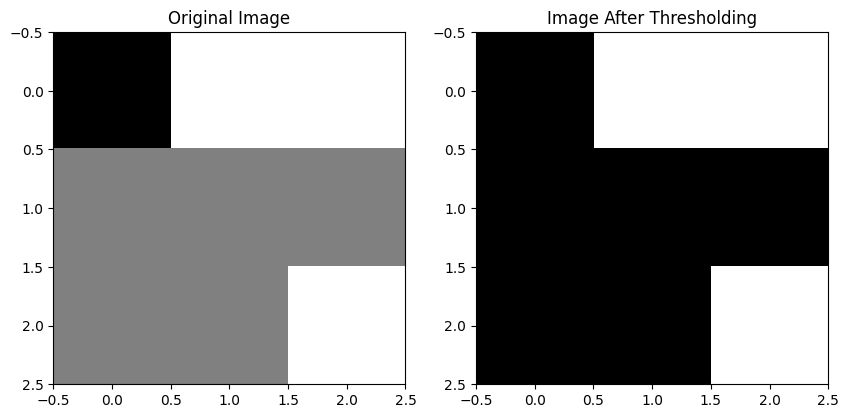

In [33]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(toy_image, cmap="gray")
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(thresholding_toy, cmap="gray")
plt.title("Image After Thresholding")
plt.show()

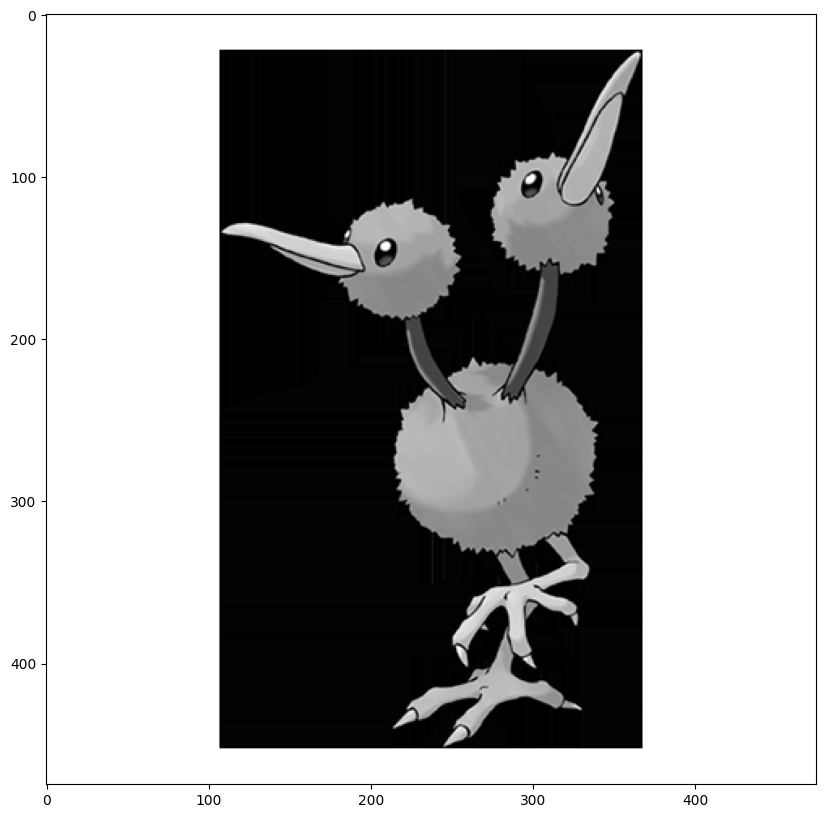

In [34]:
doduo = "/kaggle/input/pokemon-images-first-generation17000-files/pokemon/Doduo/00000000.png"
image = cv2.imread(doduo, cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap="gray")
plt.show()

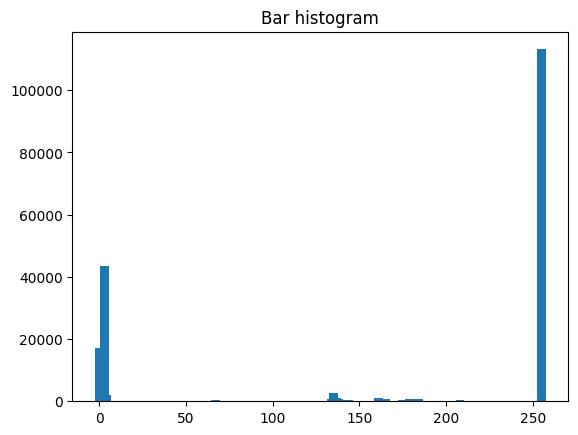

In [35]:
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.bar(intensity_values, hist[:, 0], width=5)
plt.title("Bar histogram")
plt.show()

In [36]:
threshold = 87
max_value = 255
min_value = 0
new_image = thresholding(image, threshold=threshold, max_value=max_value, min_value=min_value)

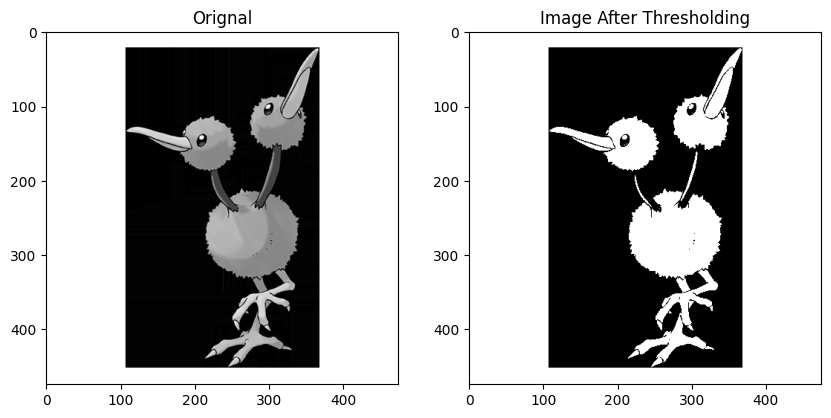

In [37]:
plot_image(image, new_image, "Orignal", "Image After Thresholding")

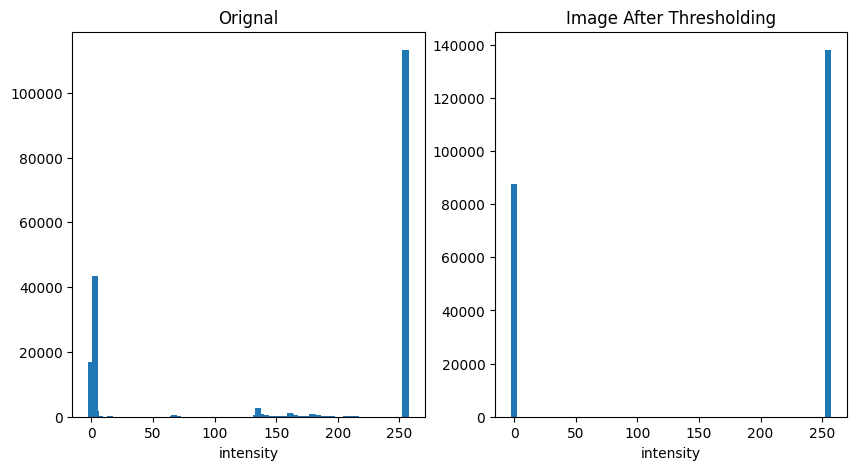

In [38]:
plt.figure(figsize=(10,5))
plot_hist(image, new_image, "Orignal", "Image After Thresholding")

In [39]:
cv2.THRESH_BINARY

0

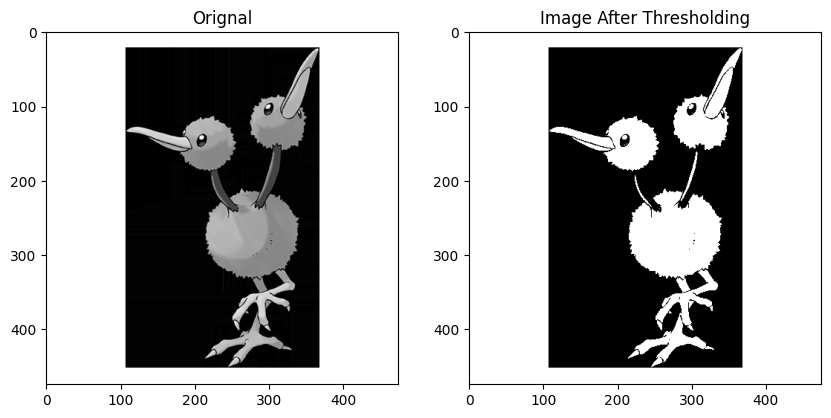

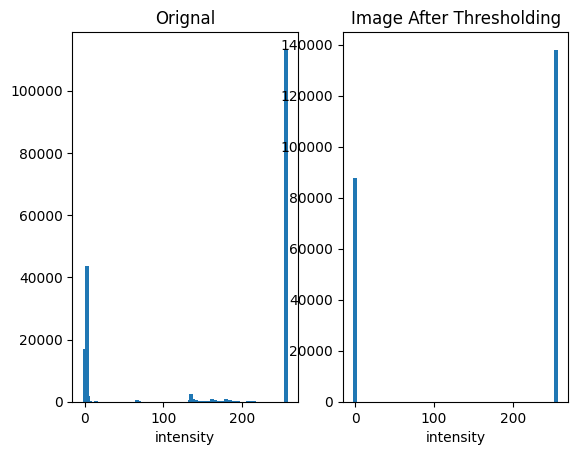

In [40]:
ret, new_image = cv2.threshold(image,threshold,max_value,cv2.THRESH_BINARY)
plot_image(image,new_image,"Orignal","Image After Thresholding")
plot_hist(image, new_image,"Orignal","Image After Thresholding")

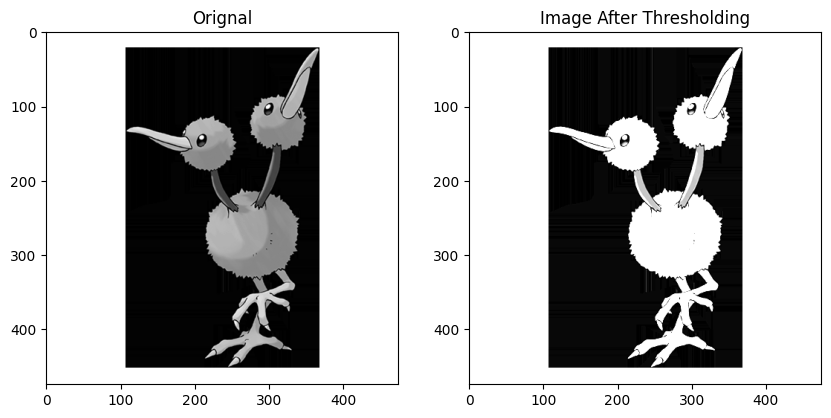

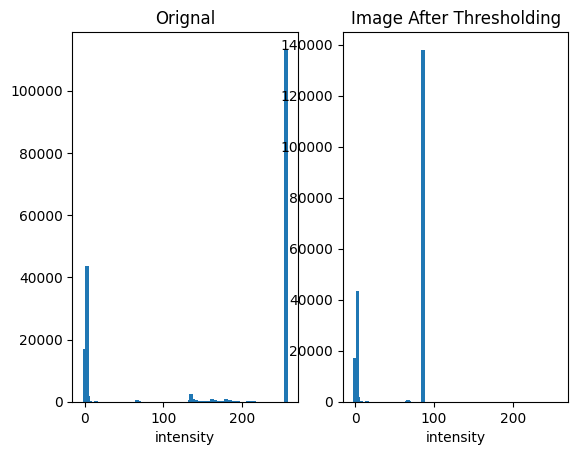

In [41]:
ret, new_image = cv2.threshold(image,86,255,cv2.THRESH_TRUNC)
plot_image(image,new_image,"Orignal","Image After Thresholding")
plot_hist(image, new_image,"Orignal","Image After Thresholding")

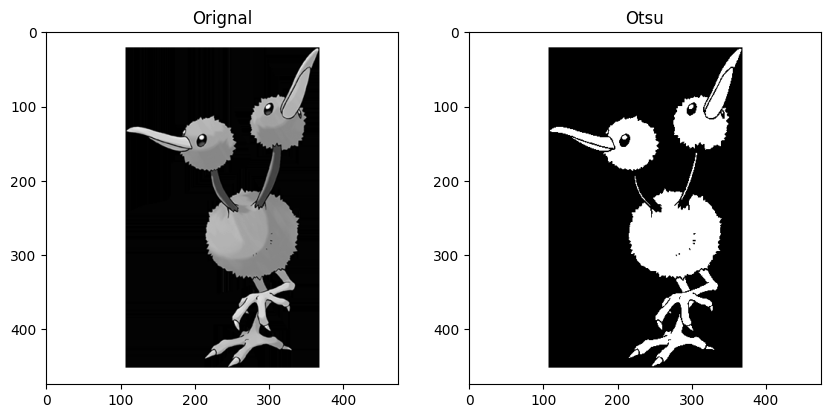

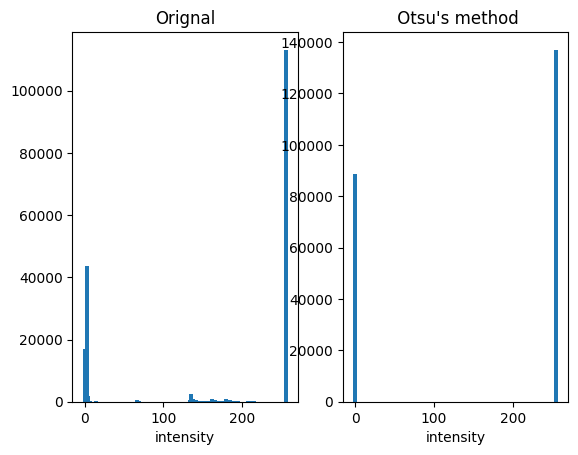

In [42]:
ret, otsu = cv2.threshold(image,0,255,cv2.THRESH_OTSU)
plot_image(image,otsu,"Orignal","Otsu")
plot_hist(image, otsu,"Orignal"," Otsu's method")